In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
pro_image=[]
f = open("C:\\Users\\hirun\\CSD 3\\Output.txt", "r")
for i in range(16385):
    k=f.readline()
    if(i==0):
        continue
    
    #print(k)
    pro_image.append(int(k,2))

pro_image=np.array(pro_image)
pro_image=pro_image.reshape(128,128)
print(pro_image)

[[135 129 144 ...  92  95  57]
 [131 127 145 ...  94 102  23]
 [129 127 143 ...  98  45  22]
 ...
 [ 30  45 193 ...  41  36  31]
 [ 30  41 193 ...  33  30  61]
 [ 25  37 189 ...  16  44  67]]


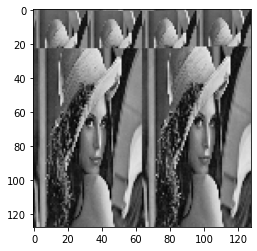

In [12]:
plt.imshow(pro_image,cmap='gray')

In [13]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

[[137 136 133 ... 145 148 114]
 [137 136 133 ... 145 148 114]
 [138 133 134 ... 133 125  87]
 ...
 [ 28  28  29 ...  53  62  59]
 [ 20  25  26 ...  64  69  65]
 [ 22  30  25 ...  71  68  72]]


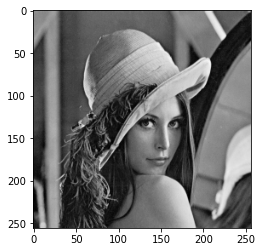

In [14]:
img=cv.imread('lena.tif',cv.IMREAD_ANYCOLOR)
[width,hight]=img.shape
print(img)
plt.imshow(img,cmap='gray')
plt.show()

In [15]:
mem = img.reshape(-1,1)

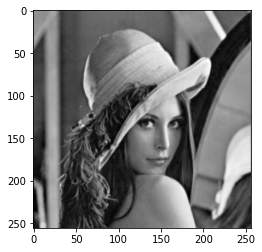

[[137 136 133 ... 145 148 114]
 [137 135 133 ... 139 138 118]
 [132 133 133 ... 120 110  94]
 ...
 [ 30  27  28 ...  52  59  52]
 [ 27  26  26 ...  62  66  65]
 [ 22  30  25 ...  71  68  72]]


In [16]:
AC = 0 # 16 bit
Z  = 1 # 1 bit
R  = 0 # 16 bit - store calculated data for filtering
R0 = 0 # 16 bit - read address for filtering
R1 = 0 # 16 bit - limit of loops for filtering - read address for sampling
R2 = 0 # 16 bit - write address for sampling
R3 = 0 # 16 bit - no of rows in down sampled image
R4 = 0 # 16 bit - filtering address - no of columns in down sampled image
AC,Z = 0,1
R1 = 65022 # (256*(256-2))-2
AC,Z = 0,1
R4 = 257 # first pixel to be filtered
while True:
    #taking values from middle row of the kernal
    R = 0
    R0 = R4
    AC = mem[R0][0]
    R = AC*16
    R0 += 1
    AC = mem[R0][0]
    R += (AC*3)
    R0 -= 2
    AC = mem[R0][0]
    R += (AC*3)
    #taking values from lower row of the kernal
    R0 = R4 + 256
    AC = mem[R0][0]
    R += (AC*3)
    R0 += 1
    AC = mem[R0][0]
    R += AC
    R0 -= 2
    AC = mem[R0][0]
    R += AC
    #taking values from upper row of the kernal
    R0 = R4 - 256
    AC = mem[R0][0]
    R += (AC*3)
    R0 += 1
    AC = mem[R0][0]
    R += AC
    R0 -= 2
    AC = mem[R0][0]
    R += AC
    R = R/32
    mem[R4][0] = R
    R4 += 1
    R1 -= 1
    if R1 == 0:
        Z = 0
    if Z == 0:
        break
filtered_image = mem.reshape(256,256)
plt.imshow(filtered_image,cmap='gray')
plt.show()
print(filtered_image)

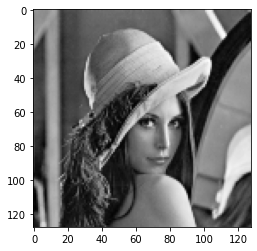

[[137 133 138 ...  86 123 148]
 [132 133 134 ...  90 111 110]
 [117 130 131 ...  89  49  27]
 ...
 [ 26  31  38 ...  31  27  28]
 [ 28  28  34 ...  31  33  47]
 [ 27  26  30 ...  33  52  66]]


In [17]:
R3 = 128
R1 = 0
R2 = 0
while True:
    R4 = 128
    while True:
        AC,Z = 0,1
        AC = mem[R1][0]
        mem[R2][0] = AC
        R2 += 1
        R1 += 2
        R4 -= 1
        if R4 == 0:
            Z = 0
        if Z == 0:
            break
    AC,Z = 0,1
    R1 += 256
    R4 = 128
    R3 -= 1
    if R3 == 0:
        Z = 0
    if Z == 0:
        break
dwn_smpld_image = mem[0:16384].reshape(128,128) #16384 = 128*128
plt.imshow(dwn_smpld_image,cmap='gray')
plt.show()
print(dwn_smpld_image)

In [18]:
mse(pro_image,dwn_smpld_image)

5454.0045166015625